In [1]:
# Import necessary libraries for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
# Import Keras from TensorFlow
from tensorflow import keras

In [ ]:
# Import specific layers and dataset from Keras
from keras.layers import Dense , Conv2D , MaxPool2D , Flatten
from keras.datasets import mnist
from keras.models import Sequential

In [ ]:
# Import libraries for model evaluation and visualization
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Enable inline plotting for matplotlib
%matplotlib inline

In [ ]:
# Load the MNIST dataset
# X_train, X_test contain image data; y_train, y_test contain labels
(X_train , y_train ),(X_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Print the shapes of the loaded datasets to understand their dimensions
print(X_train.shape) # (num_samples, height, width)
print(y_train.shape) # (num_samples,)
print(X_test.shape)  # (num_samples, height, width)
print(y_test.shape)  # (num_samples,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Number is : 5


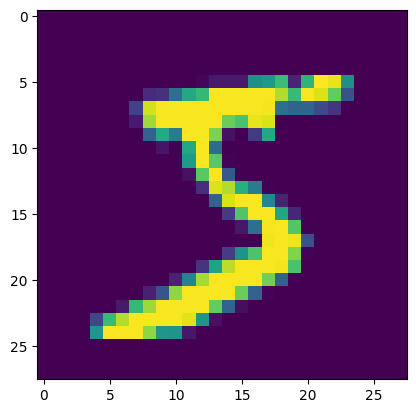

In [ ]:
# Display the first training image and its corresponding label
plt.imshow(X_train[0])
print("Number is :",  y_train[0])

In [ ]:
# Normalize image data to a range of 0 to 1
# Convert to float32 and divide by 255 (max pixel value)
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
# Display the normalized first training image data
# This shows the pixel values are now between 0 and 1
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Reshape the image data to include a channel dimension
# CNNs typically expect input in the format (batch_size, height, width, channels)
# MNIST images are grayscale, so they have 1 channel.
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
# Display the reshaped first training image data
# Note the added channel dimension at the end of each pixel array
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
# Print the updated shapes of the training data after reshaping
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [ ]:
# Initialize a Sequential model
model = Sequential()

# Add the first convolutional block
# Conv2D: 32 filters, 3x3 kernel, ReLU activation, 'same' padding, input shape for the first layer
# MaxPool2D: 2x2 pool size, stride of 2
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2))

# Add the second convolutional block
# Conv2D: 64 filters, 3x3 kernel, ReLU activation, 'same' padding
# MaxPool2D: 2x2 pool size, stride of 2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Flatten the output from the convolutional layers
# This converts the 2D feature maps into a 1D vector for dense layers
model.add(Flatten())

In [ ]:
# Add fully connected (Dense) layers
# Dense(64): Hidden layer with 64 units and ReLU activation
# Dense(10): Output layer with 10 units (for 10 classes) and softmax activation for probabilities
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
# Display a summary of the model architecture, including layer types, output shapes, and number of parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,172 (1.79 MB)

 Trainable params: 469,172 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
# optimizer='adam': Adam optimizer (an efficient gradient descent algorithm)
# loss='sparse_categorical_crossentropy': Loss function for multi-class classification with integer labels
# metrics=['accuracy']: Metric to monitor during training and evaluation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the model using the training data
# epochs=5: Number of complete passes through the training dataset
# validation_split=0.3: Use 30% of the training data as validation data
history = model.fit(X_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4645 - loss: 1.3765 - val_accuracy: 0.9762 - val_loss: 0.1370
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9782 - loss: 0.0990 - val_accuracy: 0.9853 - val_loss: 0.0624
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9875 - loss: 0.0486 - val_accuracy: 0.9877 - val_loss: 0.0471
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9927 - loss: 0.0289 - val_accuracy: 0.9861 - val_loss: 0.0619
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9939 - loss: 0.0227 - val_accuracy: 0.9827 - val_loss: 0.0751


In [ ]:
# Evaluate the trained model on the test dataset
# Returns the loss value and metrics values for the model in test mode
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9834 - loss: 0.0662


[0.05673268437385559, 0.9857000112533569]

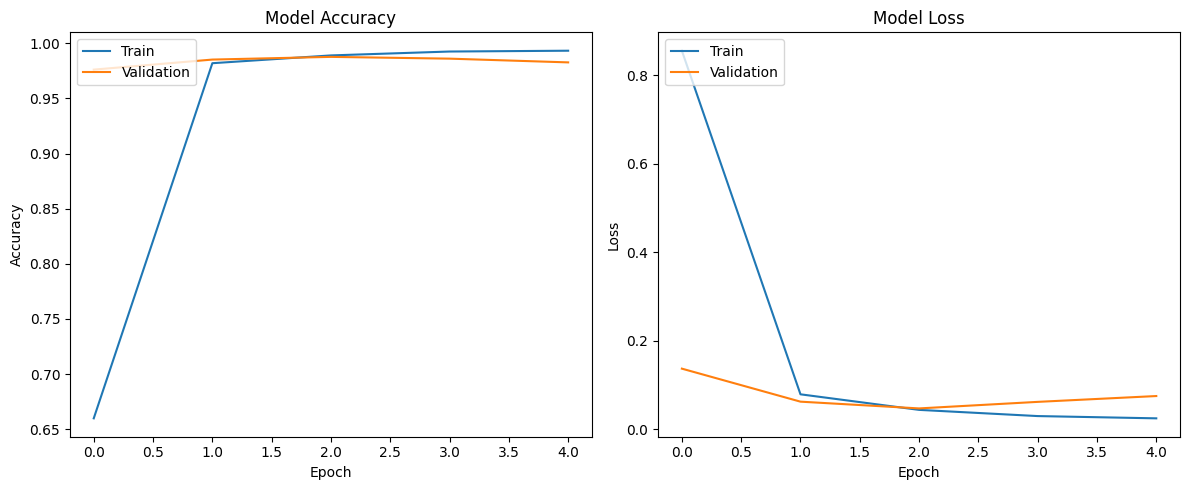

In [ ]:
# Plot training and validation accuracy and loss over epochs
# This helps visualize model learning and detect overfitting/underfitting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # Subplot for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2) # Subplot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.97      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.97      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



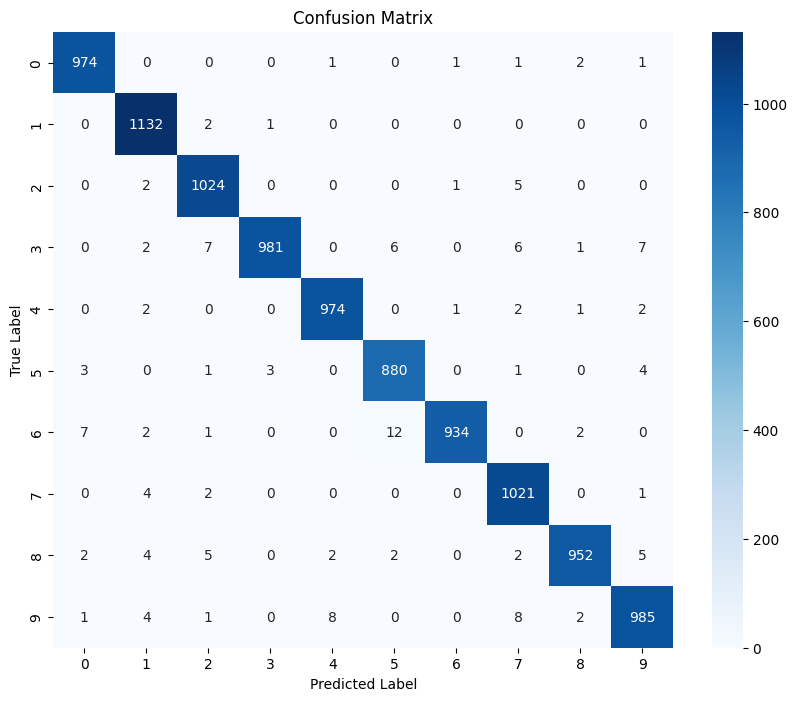

In [ ]:
# Predict probabilities for the test set images
y_pred_probs = model.predict(X_test)
# Convert probabilities to class labels (the digit with the highest probability)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print the classification report
# This includes precision, recall, f1-score, and support for each class
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate and plot the confusion matrix
# A confusion matrix visualizes the performance of an algorithm, especially for classification problems
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # annot=True to show values, fmt='d' for integer format
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Select a sample image from the test set for individual prediction
sample_data = X_test[1999]

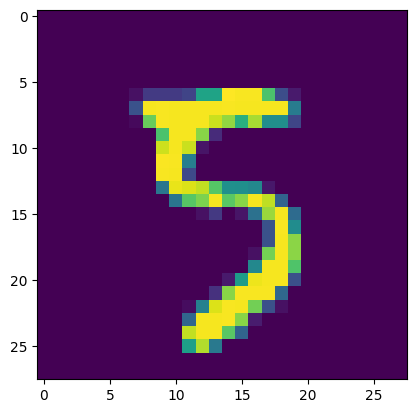

In [ ]:
# Display the selected sample image
plt.imshow(sample_data)
plt.show()

In [ ]:
# Make a prediction for the single sample image
# Reshape the sample data to (1, 28, 28, 1) to match model input requirements
Y_pred = model.predict(sample_data.reshape(1,28,28,1))
# Get the predicted class label
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[5]


In [ ]:
# Define a list of class labels for visualization purposes
data_class = ['0','1','2','3','4','5','6','7','8','9']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of correctly classified images: 9857
Number of incorrectly classified images: 143


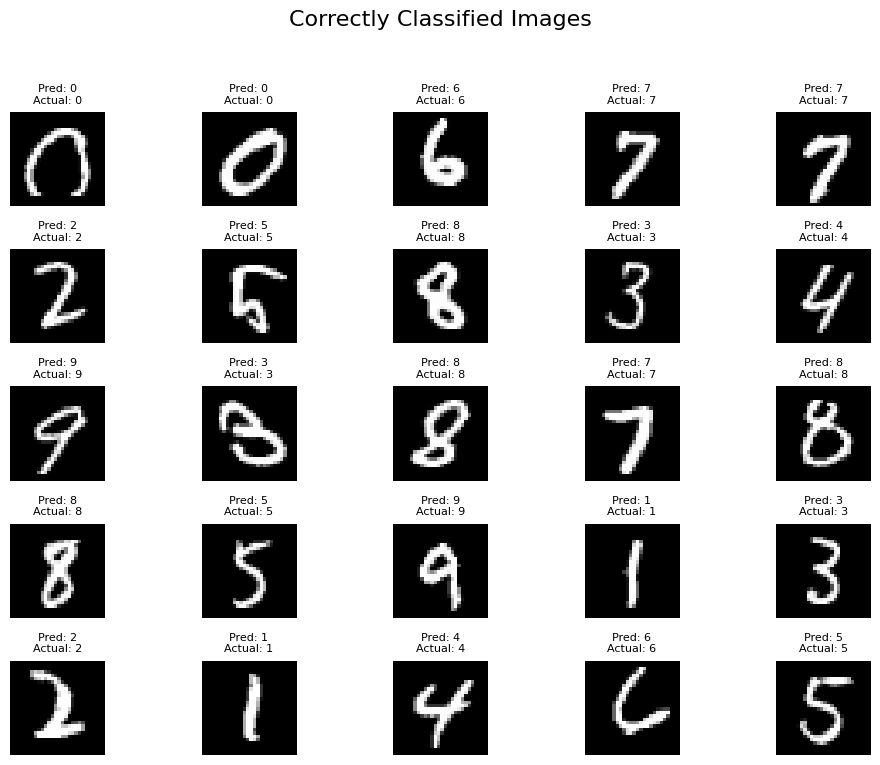

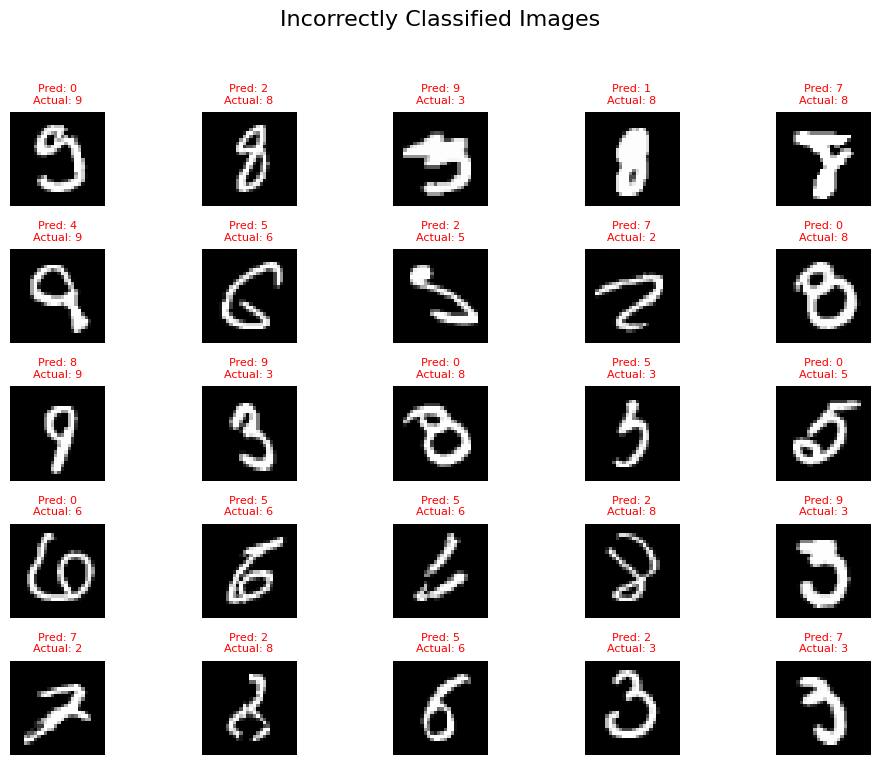

In [ ]:
# Get full predictions for the entire test set
y_pred_full = model.predict(X_test)
y_pred_full = np.argmax(y_pred_full,axis=1)

# Find indices of correctly and incorrectly classified images
correct_indices = np.where(y_pred_full == y_test)[0]
incorrect_indices = np.where(y_pred_full != y_test)[0]

# Print counts of correctly and incorrectly classified images
print(f"Number of correctly classified images: {len(correct_indices)}")
print(f"Number of incorrectly classified images: {len(incorrect_indices)}")

# Visualize some correctly classified images
plt.figure(figsize=(10, 8))
plt.suptitle("Correctly Classified Images", fontsize=16)
# Randomly sample up to 25 correctly classified images
for i, correct in enumerate(random.sample(list(correct_indices), min(25, len(correct_indices)))):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {data_class[y_pred_full[correct]]}\nActual: {data_class[y_test[correct]]}", fontsize=8)
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

# Visualize some incorrectly classified images
plt.figure(figsize=(10, 8))
plt.suptitle("Incorrectly Classified Images", fontsize=16)
# Randomly sample up to 25 incorrectly classified images
for i, incorrect in enumerate(random.sample(list(incorrect_indices), min(25, len(incorrect_indices)))):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {data_class[y_pred_full[incorrect]]}\nActual: {data_class[y_test[incorrect]]}", fontsize=8, color='red')
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()